In [9]:

# K-fold cross-validation is a superior technique to validate the performance of our model. It evaluates the 
# model using different chunks of the data set as the validation set. K-fold cross-validation is defined as a 
# method for estimating the performance of a model on unseen data. This technique is recommended to be used when 
# the data is scarce and there is an ask to get a good estimate of training and generalization error thereby 
# understanding the aspects such as underfitting and overfitting.

# We divide our data set into K-folds. K represents the number of folds into which you want to split your data. 
# If we use 5-folds, the data set divides into five sections. In different iterations, one part becomes the 
# validation set.


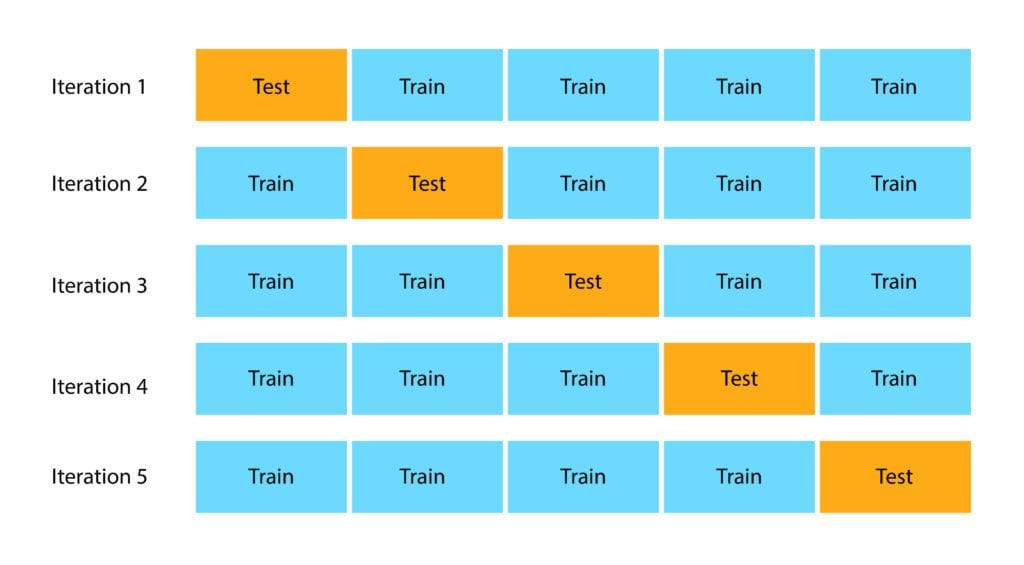

In [11]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\"
Image(filename = PATH + "Capture1.jpeg", width=600)


In [4]:

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import StratifiedKFold

import statsmodels.api as sm
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris

iris = load_iris()
iris

X = iris.data[:, :3]  # we only take the first three features.
y = iris.target


In [7]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, max_depth=4))


strtfdKFold = StratifiedKFold(n_splits=5)
kfold = strtfdKFold.split(X_train, y_train)
scores = []


In [8]:

for k, (train, test) in enumerate(kfold):
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train), score))
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))


Fold:  1, Training/Test Split Distribution: [39 37 44], Accuracy: 0.933
Fold:  2, Training/Test Split Distribution: [39 37 44], Accuracy: 0.967
Fold:  3, Training/Test Split Distribution: [39 37 44], Accuracy: 0.933
Fold:  4, Training/Test Split Distribution: [39 37 44], Accuracy: 0.900
Fold:  5, Training/Test Split Distribution: [39 37 44], Accuracy: 0.900


Cross-Validation accuracy: 0.927 +/- 0.025
